In [12]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
df = pd.read_csv('suicide_vs_depression.csv')
df.head()

,title,selftext,author,num_comments,is_suicide,url
0,Our most-broken and least-understood rules is ...,We understand that most people who reply immed...,SQLwitch,180,0,https://www.reddit.com/r/depression/comments/d...
1,"Regular check-in post, with information about ...",Welcome to /r/depression's check-in post - a p...,circinia,186,0,https://www.reddit.com/r/depression/comments/t...
2,Do I kill myself or make this pb&amp;j,Dammit why do I have to eat so often,thriving_no,30,0,https://www.reddit.com/r/depression/comments/t...
3,"I’m 25, I’ve never been on a date, haven’t mad...",I have a bachelors of science in psychology bu...,UnathorizedMaterial,70,0,https://www.reddit.com/r/depression/comments/t...
4,(TW: self harm) I thought I had overcome self ...,Just want to preface this by saying that this ...,siouxsie18,44,0,https://www.reddit.com/r/depression/comments/t...


In [11]:
df.drop(['author', 'url', 'title'], inplace=True, axis=1)
df.head()

KeyError: "['author' 'url' 'title'] not found in axis"

In [13]:
df.isnull().any()


title           False
selftext        False
author          False
num_comments    False
is_suicide      False
url             False
dtype: bool

<AxesSubplot:>

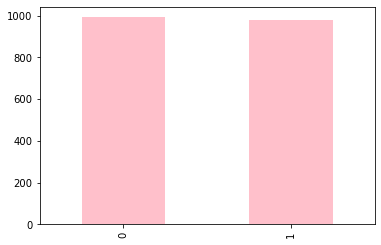

In [14]:
df['is_suicide'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))


In [15]:
import pandas as pd
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

# Removing stop words
stop = stopwords.words('english')
df['selftext_without_stopwords'] = df['selftext'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# TOKENIZATION
tt = TweetTokenizer()
df['tokenised_selftext'] = df['selftext_without_stopwords'].apply(tt.tokenize)
print(df)

lmtzr = WordNetLemmatizer()
df['lemmatize'] = df['tokenised_selftext'].apply(
                    lambda lst:[lmtzr.lemmatize(word) for word in lst])
df.head()


                                                  title  \
0     Our most-broken and least-understood rules is ...   
1     Regular check-in post, with information about ...   
2                Do I kill myself or make this pb&amp;j   
3     I’m 25, I’ve never been on a date, haven’t mad...   
4     (TW: self harm) I thought I had overcome self ...   
...                                                 ...   
1967                                                 tw   
1968  im literally this close to killing myself earlier   
1969                      I just want to stop breathing   
1970  to all those people that says that social anxi...   
1971                                           Rambling   

                                               selftext               author  \
0     We understand that most people who reply immed...             SQLwitch   
1     Welcome to /r/depression's check-in post - a p...             circinia   
2                  Dammit why do I have to eat so o

,title,selftext,author,num_comments,is_suicide,url,selftext_without_stopwords,tokenised_selftext,lemmatize
0,Our most-broken and least-understood rules is ...,We understand that most people who reply immed...,SQLwitch,180,0,https://www.reddit.com/r/depression/comments/d...,We understand people reply immediately OP invi...,"[We, understand, people, reply, immediately, O...","[We, understand, people, reply, immediately, O..."
1,"Regular check-in post, with information about ...",Welcome to /r/depression's check-in post - a p...,circinia,186,0,https://www.reddit.com/r/depression/comments/t...,Welcome /r/depression's check-in post - place ...,"[Welcome, /, r, /, depression's, check-in, pos...","[Welcome, /, r, /, depression's, check-in, pos..."
2,Do I kill myself or make this pb&amp;j,Dammit why do I have to eat so often,thriving_no,30,0,https://www.reddit.com/r/depression/comments/t...,Dammit I eat often,"[Dammit, I, eat, often]","[Dammit, I, eat, often]"
3,"I’m 25, I’ve never been on a date, haven’t mad...",I have a bachelors of science in psychology bu...,UnathorizedMaterial,70,0,https://www.reddit.com/r/depression/comments/t...,I bachelors science psychology it’s complete f...,"[I, bachelors, science, psychology, it, ’, s, ...","[I, bachelor, science, psychology, it, ’, s, c..."
4,(TW: self harm) I thought I had overcome self ...,Just want to preface this by saying that this ...,siouxsie18,44,0,https://www.reddit.com/r/depression/comments/t...,"Just want preface saying fucked up, I know it....","[Just, want, preface, saying, fucked, up, ,, I...","[Just, want, preface, saying, fucked, up, ,, I..."


In [16]:

df.drop(['selftext'], inplace=True, axis=1)
df['len'] = df['selftext_without_stopwords'].str.len()

df.head()

,title,author,num_comments,is_suicide,url,selftext_without_stopwords,tokenised_selftext,lemmatize,len
0,Our most-broken and least-understood rules is ...,SQLwitch,180,0,https://www.reddit.com/r/depression/comments/d...,We understand people reply immediately OP invi...,"[We, understand, people, reply, immediately, O...","[We, understand, people, reply, immediately, O...",3438
1,"Regular check-in post, with information about ...",circinia,186,0,https://www.reddit.com/r/depression/comments/t...,Welcome /r/depression's check-in post - place ...,"[Welcome, /, r, /, depression's, check-in, pos...","[Welcome, /, r, /, depression's, check-in, pos...",1855
2,Do I kill myself or make this pb&amp;j,thriving_no,30,0,https://www.reddit.com/r/depression/comments/t...,Dammit I eat often,"[Dammit, I, eat, often]","[Dammit, I, eat, often]",18
3,"I’m 25, I’ve never been on a date, haven’t mad...",UnathorizedMaterial,70,0,https://www.reddit.com/r/depression/comments/t...,I bachelors science psychology it’s complete f...,"[I, bachelors, science, psychology, it, ’, s, ...","[I, bachelor, science, psychology, it, ’, s, c...",1015
4,(TW: self harm) I thought I had overcome self ...,siouxsie18,44,0,https://www.reddit.com/r/depression/comments/t...,"Just want preface saying fucked up, I know it....","[Just, want, preface, saying, fucked, up, ,, I...","[Just, want, preface, saying, fucked, up, ,, I...",1656


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

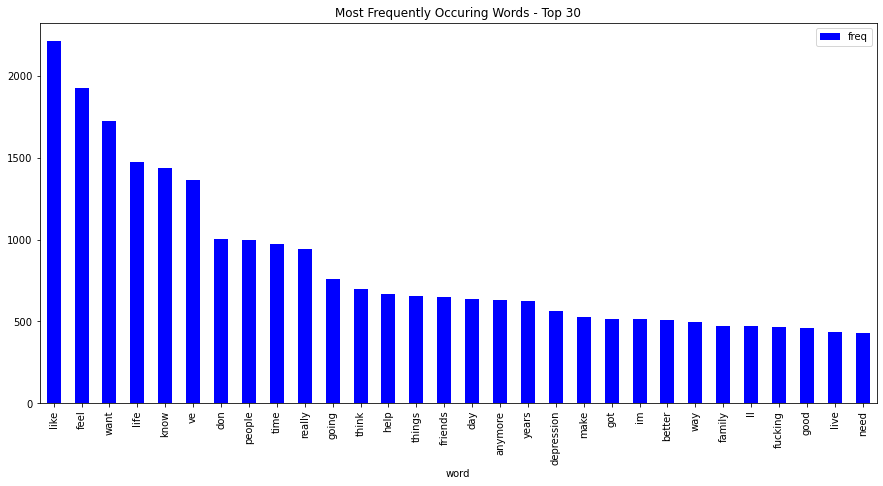

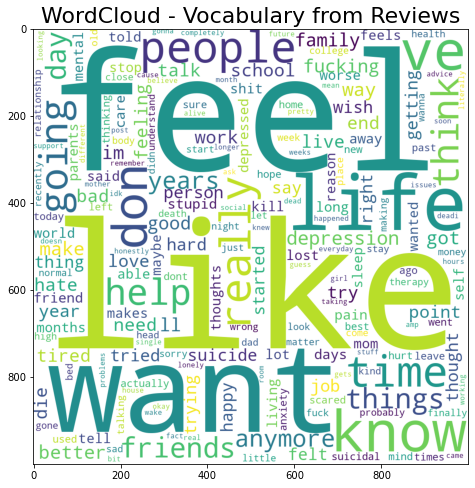

In [17]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.selftext_without_stopwords)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)


In [18]:
# saving combined CSV
df.to_csv('suicide_vs_depression_update1.csv', index = False)

df.head()


<bound method NDFrame.head of                                                   title               author  \
0     Our most-broken and least-understood rules is ...             SQLwitch   
1     Regular check-in post, with information about ...             circinia   
2                Do I kill myself or make this pb&amp;j          thriving_no   
3     I’m 25, I’ve never been on a date, haven’t mad...  UnathorizedMaterial   
4     (TW: self harm) I thought I had overcome self ...           siouxsie18   
...                                                 ...                  ...   
1967                                                 tw   Smooth-Future-7376   
1968  im literally this close to killing myself earlier         ayumusenpaii   
1969                      I just want to stop breathing      introvertafsrry   
1970  to all those people that says that social anxi...        MyabyssoverBP   
1971                                           Rambling     throwaway9589486   

      num